(-0.5, 299.5, 299.5, -0.5)

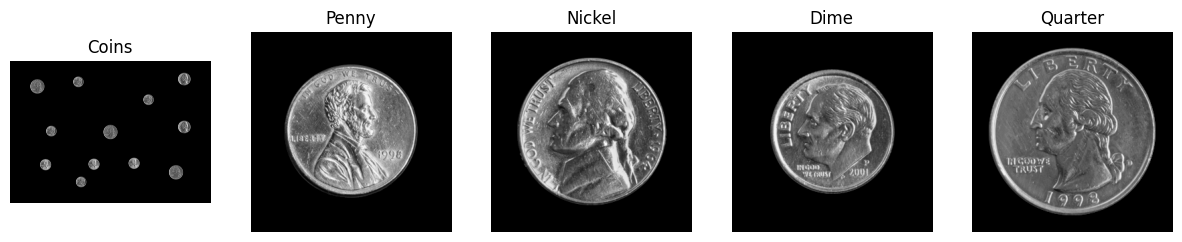

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

coins = cv.imread("Images/coins/coins.png", cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread("Images/coins/Penny.png", cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread("Images/coins/Nickel.png", cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread("Images/coins/Dime.png", cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread("Images/coins/Quarter.png", cv.IMREAD_GRAYSCALE)
assert q is not None

plt.figure(figsize=(15, 15))
plt.subplot(1,5,1)
plt.imshow(X=coins, cmap="gray")
plt.title("Coins")
plt.axis("off")

plt.subplot(1,5,2)
plt.imshow(X=p, cmap="gray")
plt.title("Penny")
plt.axis("off")

plt.subplot(1,5,3)
plt.imshow(X=n, cmap="gray")
plt.title("Nickel")
plt.axis("off")

plt.subplot(1,5,4)
plt.imshow(X=d, cmap="gray")
plt.title("Dime")
plt.axis("off")

plt.subplot(1,5,5)
plt.imshow(X=q, cmap="gray")
plt.title("Quarter")
plt.axis("off")

In [3]:
# Get the template matching responses
p_response = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
n_response = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_response = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_response = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)

In [4]:
print(f"{p_response.min()=} {p_response.max()=}")

p_response.min()=-0.32741788 p_response.max()=1.0


(-0.5, 3208.5, 2180.5, -0.5)

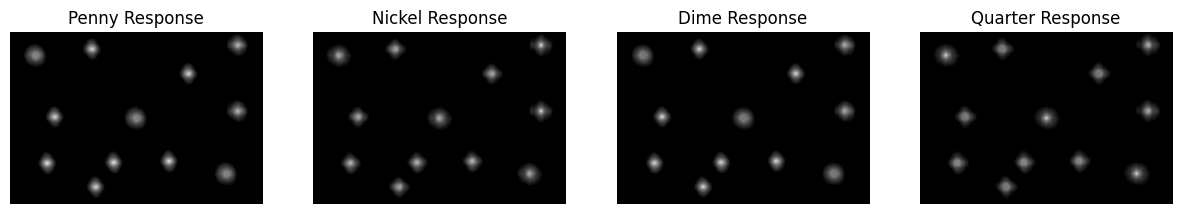

In [5]:
plt.figure(figsize=(15,15))
plt.subplot(1,4,1)
plt.imshow(X=p_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Penny Response")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(X=n_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Nickel Response")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(X=d_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Dime Response")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(X=q_response, cmap="gray", vmin=0, vmax=1)
plt.title(label="Quarter Response")
plt.axis("off")

In [6]:
p_response.shape

(2181, 3209)

In [7]:
stacked = np.stack(arrays=[p_response, n_response, d_response, q_response], axis=2)

In [12]:
stacked.shape

(2181, 3209, 4)

In [13]:
from skimage.feature import peak_local_max


# Get the template matching responses
p_response = cv.matchTemplate(coins, p, cv.TM_SQDIFF_NORMED)
n_response = cv.matchTemplate(coins, n, cv.TM_SQDIFF_NORMED)
d_response = cv.matchTemplate(coins, d, cv.TM_SQDIFF_NORMED)
q_response = cv.matchTemplate(coins, q, cv.TM_SQDIFF_NORMED)

# Vertically stack the responses along a new axis 
stacked = np.stack(arrays=[p_response, n_response, d_response, q_response], axis=2)
# print(stacked.shape) # (2181, 3209, 4)

pastel_colors = [
  (255, 182, 193), # Pastel Pink 
  (173, 216, 230), # Pastel Blue 
  (119, 221, 119), # Pastel Green
  (253, 253, 150)  # Pastel Yellow
]

# Make a color image to draw on 
coins_color = cv.cvtColor(coins, cv.COLOR_GRAY2BGR)

# Find the local maxima in the stacked responses
coordinates = peak_local_max(stacked, exclude_border=0, min_distance=5, threshold_abs=0.8)
print(coordinates)

# Plot on each color 
for coord in coordinates:
  y, x, c = coord
  template_shape = [p.shape, n.shape, d.shape, q.shape][c]
  cv.rectangle(coins_color, (x, y), (x + template_shape[1], y + template_shape[0]), pastel_colors[c], thickness=12)

template_names = ["Penny", "Nickel", "Dime", "Quarter"]

legend_scale = 0.8
rectangle_size = 100  # Width and height of the rectangles in pixels

# Calculate the total height occupied by the legend
legend_height = int(len(template_names) * rectangle_size * legend_scale)  # Adjusted legend height based on scale

# Calculate the starting y-coordinate to vertically center the legend
start_y = (coins_color.shape[0] - legend_height) // 2

# Print a legend 
for i, (name, color) in enumerate(zip(template_names, pastel_colors)):
  scaled_font_scale = legend_scale * 3  # Adjust font scale based on legend scale
  
  # Calculate rectangle coordinates
  rect_top_left = (10, start_y + int(rectangle_size * legend_scale * i))
  rect_bottom_right = (10 + int(rectangle_size * legend_scale), start_y + int(rectangle_size * legend_scale + rectangle_size * legend_scale * i))
  
  # Draw rectangle
  cv.rectangle(coins_color, rect_top_left, rect_bottom_right, color=color, thickness=-1)
  
  # Calculate text position
  text_x = 30 + int(rectangle_size * legend_scale)
  text_y = start_y + int(rectangle_size * legend_scale + 0.5 * rectangle_size * legend_scale * (2 * i + 1)) - int(rectangle_size/2)
  
  # Draw text
  cv.putText(coins_color, name, (text_x, text_y), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=scaled_font_scale, color=(255, 255, 255), thickness=2, lineType=cv.LINE_AA)

plt.figure(figsize=(15,15))
plt.imshow(X=coins_color)
plt.axis("off")
plt.show()


KeyboardInterrupt: 

In [10]:
coin_values = [0.01, 0.05, 0.10, 0.25]
total_value = 0
coin_count = [0, 0, 0, 0]

for coord in coordinates:
    c = coord[2]
    coin_count[c] += 1
    total_value += coin_values[c]

print(f"Total value of the coins: ${total_value:.2f}")
print(f"Coin counts: Pennies: {coin_count[0]}, Nickels: {coin_count[1]}, Dimes: {coin_count[2]}, Quarters: {coin_count[3]}")

Total value of the coins: $1.28
Coin counts: Pennies: 3, Nickels: 2, Dimes: 4, Quarters: 3
